<center>
<h1>Fake news detection using graph neural network</h1>
<h2>Basic GNN</h2>
<i><h6>Victor GOUBET | Nicholas Tagliapietra | Asma Bakhtiariazad</h6></i>
</center>


----

# Library

In [1]:
import torch
import pickle as pk

from torch.nn import Linear, LogSoftmax
from tool_box.upfd_dataset import ext_UPFD
from tool_box.GNN_train import plot_hist, train_all_and_optimize
from torch_geometric.nn import GCNConv, global_mean_pool, global_max_pool

# Import datasets

In [2]:
datasets = pk.load(open('../data/datasets.pkl', 'rb'))

# Define the model

In [3]:
class Basic_GNN(torch.nn.Module):

    def __init__(self, num_n_feature, num_g_feature, emb_size):
        super(Basic_GNN, self).__init__()
        torch.manual_seed(42)
        self.emb_size = emb_size

        self.in_layer = GCNConv(num_n_feature, emb_size)
        self.conv = GCNConv(emb_size, emb_size)
       
       # check if we have graph features to concatenate or not
        i = 2
        if num_g_feature:
             self.lin_g = Linear(num_g_feature, emb_size)
             i = 3

        self.out_layer = Linear(i * emb_size, 2)
        self.act = LogSoftmax(dim=-1)
    
    def forward(self, x, edges_idx, batch_idx, g_features):
        
        x = self.in_layer(x, edges_idx)
        
        x = self.conv(x, edges_idx)

        flatten = torch.cat([global_mean_pool(x, batch_idx),
                             global_max_pool(x, batch_idx)], axis=1)

        if g_features.size()[-1] > 1:
            g_ft = self.lin_g(g_features)
            flatten = torch.cat([flatten, g_ft], axis=1)

        out = self.act(self.out_layer(flatten))

        return out


# Training

In [4]:
models = train_all_and_optimize(Basic_GNN, datasets, epochs = 60)

[I 2022-01-05 20:56:08,911] A new study created in memory with name: no-name-422e9562-c496-4fa3-ab43-4deb2747cc3b


--> Train on: origin


[I 2022-01-05 20:56:48,068] Trial 0 finished with value: 0.8585324754901961 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 80}. Best is trial 0 with value: 0.8585324754901961.
[I 2022-01-05 20:57:09,027] Trial 1 finished with value: 0.8096660539215685 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.01, 'batch_size': 256, 'embedding_space_dim': 160}. Best is trial 0 with value: 0.8585324754901961.
[I 2022-01-05 20:57:21,920] Trial 2 finished with value: 0.8297334558823529 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.01, 'batch_size': 512, 'embedding_space_dim': 80}. Best is trial 0 with value: 0.8585324754901961.
[I 2022-01-05 20:57:36,777] Trial 3 finished with value: 0.8523092830882353 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.01, 'batch_size': 512, 'embedding_space_dim': 120}. Best is trial 0 with value: 0.8585324754901961.
[I 2022-01-05 20:57:47,428] Trial 4 finished with value: 0.8786

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.36905463933944704  loss_val=0.4011548360188802 | acc_train=0.8487591911764707  acc_val=0.8350183823529411
Epochs: 20 | loss_train=0.3147087275981903  loss_val=0.30574191610018414 | acc_train=0.8731158088235293  acc_val=0.8866421568627452
Epochs: 30 | loss_train=0.2706684798002243  loss_val=0.3138370215892792 | acc_train=0.8911305147058824  acc_val=0.8839613970588235
Epochs: 40 | loss_train=0.26240064203739166  loss_val=0.28684039910634357 | acc_train=0.8952205882352942  acc_val=0.8852634803921569
Epochs: 50 | loss_train=0.23771608769893646  loss_val=0.2972883880138397 | acc_train=0.9075827205882353  acc_val=0.8911611519607843
Epochs: 60 | loss_train=0.22408967614173889  loss_val=0.25955363114674884 | acc_train=0.9200827205882354  acc_val=0.8911611519607843


[I 2022-01-05 20:59:28,240] A new study created in memory with name: no-name-fc96a6de-03bc-487e-8c8d-05da4a8666f4


--> Train on: dataset1


[I 2022-01-05 20:59:44,212] Trial 0 finished with value: 0.7162798713235294 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 120}. Best is trial 0 with value: 0.7162798713235294.
[I 2022-01-05 21:00:01,628] Trial 1 finished with value: 0.7271139705882353 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 128, 'embedding_space_dim': 100}. Best is trial 1 with value: 0.7271139705882353.
[I 2022-01-05 21:00:20,721] Trial 2 finished with value: 0.7748736213235294 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.001, 'batch_size': 512, 'embedding_space_dim': 160}. Best is trial 2 with value: 0.7748736213235294.
[I 2022-01-05 21:00:39,269] Trial 3 finished with value: 0.8131433823529411 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.01, 'batch_size': 128, 'embedding_space_dim': 120}. Best is trial 3 with value: 0.8131433823529411.
[I 2022-01-05 21:00:54,173] Trial 4 finished with value: 0

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.5487475428316329  loss_val=0.5469210624694825 | acc_train=0.7667483660130718  acc_val=0.8100183823529411
Epochs: 20 | loss_train=0.5761852396859063  loss_val=0.5112653613090515 | acc_train=0.7667483660130718  acc_val=0.7431985294117647
Epochs: 30 | loss_train=0.48184727629025775  loss_val=0.55098277926445 | acc_train=0.7860498366013071  acc_val=0.8095588235294118
Epochs: 40 | loss_train=0.6079183883137174  loss_val=0.5543432533740997 | acc_train=0.7509701797385621  acc_val=0.6962316176470589
Epochs: 50 | loss_train=0.4246575997935401  loss_val=0.42087980508804324 | acc_train=0.8120915032679739  acc_val=0.8221507352941175
Epochs: 60 | loss_train=0.44139592515097725  loss_val=0.42999128699302674 | acc_train=0.8073427287581699  acc_val=0.8060661764705882


[I 2022-01-05 21:01:57,556] A new study created in memory with name: no-name-cb83aaa1-b7a5-4de6-b20b-9fea80c81758


--> Train on: dataset2


[I 2022-01-05 21:02:15,339] Trial 0 finished with value: 0.8487132352941176 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 128, 'embedding_space_dim': 100}. Best is trial 0 with value: 0.8487132352941176.
[I 2022-01-05 21:02:26,876] Trial 1 finished with value: 0.8052619485294117 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 60}. Best is trial 0 with value: 0.8487132352941176.
[I 2022-01-05 21:02:40,327] Trial 2 finished with value: 0.7170649509803922 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.01, 'batch_size': 256, 'embedding_space_dim': 80}. Best is trial 0 with value: 0.8487132352941176.
[I 2022-01-05 21:03:00,067] Trial 3 finished with value: 0.7470128676470589 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 160}. Best is trial 0 with value: 0.8487132352941176.
[I 2022-01-05 21:03:17,396] Trial 4 finished with value: 0.698

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.5116541418764327  loss_val=0.4719999432563782 | acc_train=0.7848243464052288  acc_val=0.7873161764705883
Epochs: 20 | loss_train=0.4291823075877296  loss_val=0.4125803470611572 | acc_train=0.8125  acc_val=0.8377757352941175
Epochs: 30 | loss_train=0.4060145119825999  loss_val=0.36221361756324766 | acc_train=0.8232741013071895  acc_val=0.8561580882352942
Epochs: 40 | loss_train=0.46183370881610447  loss_val=0.4751797616481781 | acc_train=0.8118872549019608  acc_val=0.8130514705882353
Epochs: 50 | loss_train=0.4333754976590474  loss_val=0.3855374574661255 | acc_train=0.8347630718954249  acc_val=0.8577205882352942
Epochs: 60 | loss_train=0.3857456048329671  loss_val=0.38071843385696413 | acc_train=0.8422691993464052  acc_val=0.8345588235294118


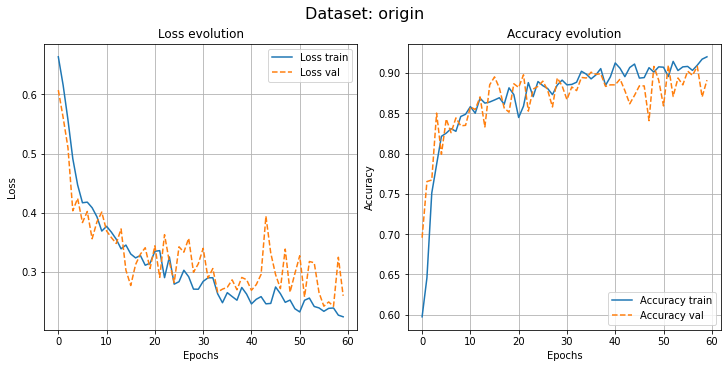

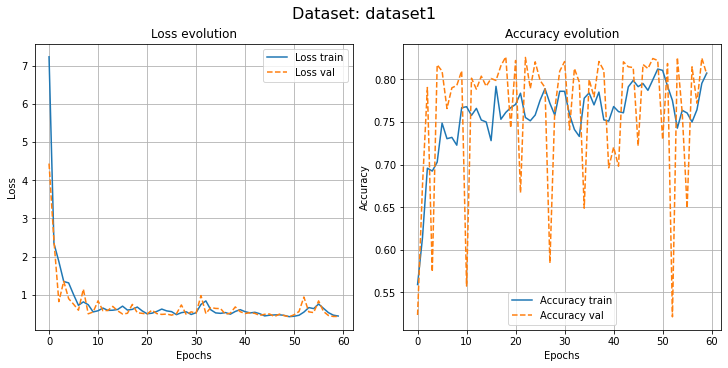

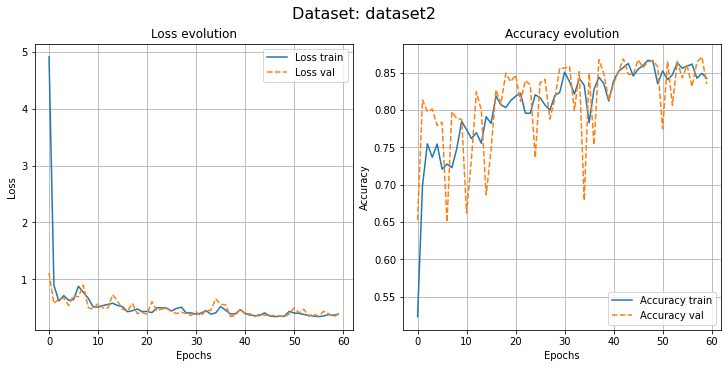

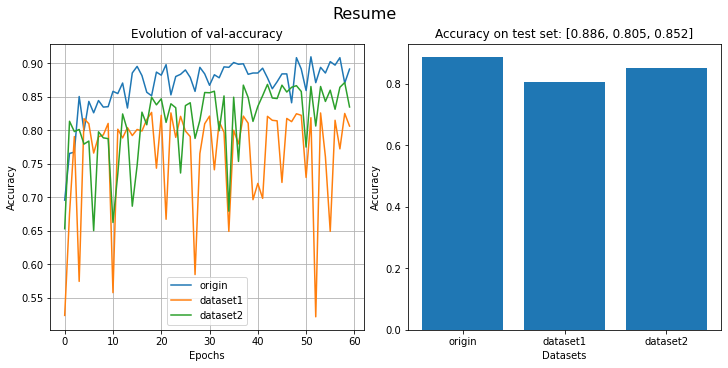

In [5]:
plot_hist(models)

# Save the three models

In [7]:
path = '../models/Basic_GNN/'
for name, model, _, _ in models:
    torch.save(model, f'{path}Basic_GNN_{name}')